In [24]:
import seaborn as sns
import pandas as pd

from yome import Session
from yome.models import *
from yome.util import to_df
from yome.constants import colors

In [2]:
from mpl_recipes import mpl_setup
%mpl_setup

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set_style('ticks')

In [6]:
session = Session()

In [16]:
# Import Y-ome
y_ome_genes = to_df(
    session.query(Gene.locus_id,
                  KnowledgebaseGene.annotation_quality)
    .join(KnowledgebaseGene)
    .join(Knowledgebase)
    .filter(Knowledgebase.name == 'Y-ome')
)

In [17]:
# Import RNA -seq
rna_raw = pd.read_csv('../data/SBRG_RNASeq_processed.tsv', sep='\t')

In [18]:
# Merge the RNA-seq data with the y-ome
rna = rna_raw.merge(y_ome_genes, left_on='bnum', right_on='locus_id', how ='inner')

In [19]:
rna.head()

,bnum,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,cond,locus_id,annotation_quality
0,b0001,1047.687992,-3.652575,0.603298,-6.054348,1.409876e-09,2.749259e-08,ac_9_92_3,b0001,high
1,b0002,14422.752314,-2.015212,0.190491,-10.579023,3.728270e-26,2.780504e-24,ac_9_92_3,b0002,high
2,b0003,3692.141252,-1.784765,0.230583,-7.740244,9.922642e-15,3.321351e-13,ac_9_92_3,b0003,high
3,b0004,4989.691791,-1.796228,0.191637,-9.373078,7.044721e-21,3.839373e-19,ac_9_92_3,b0004,high
4,b0005,202.942087,-1.632011,0.542319,-3.009317,2.618354e-03,1.466485e-02,ac_9_92_3,b0005,low


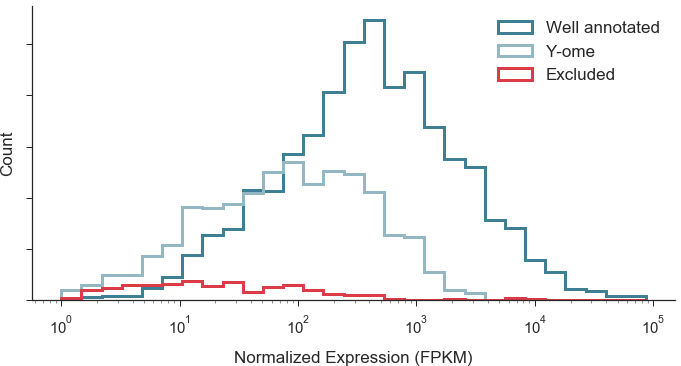

In [29]:
MAX = rna.baseMean.max()
bins = 10 ** np.linspace(0, np.log10(MAX), 30)

fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
high = rna[rna.annotation_quality == 'high'].baseMean
low = rna[rna.annotation_quality == 'low'].baseMean
excluded = rna[rna.annotation_quality == 'excluded'].baseMean
ax.set_xscale('log')
ax.hist(high, bins=bins, histtype='step', color=colors['dark blue green'], linewidth=3, label = 'Well annotated')
ax.hist(low, bins=bins, histtype='step', color=colors['light blue green'], linewidth=3, label = 'Y-ome')
ax.hist(excluded, bins=bins, histtype='step', color=colors['bright red'], linewidth=3, label = 'Excluded')
ax.set_ylabel('Count')
ax.set_xlabel('Normalized Expression (FPKM)', labelpad=15)
# hide top and right axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticklabels([])
plt.legend(loc='upper right')
fig.savefig('/Users/zaking/lab/y-ome/expression.pdf')
fig.savefig('/Users/zaking/lab/y-ome/expression.png')